In [2]:
import pickle
import random
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

MAX_POLY = 9
PARTITION_COUNT = 20
PARTITION_SIZE = 400

(80, 1) (80,) (20, 400, 1) (20, 400)


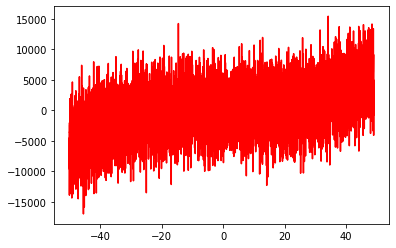

In [3]:
with open("Fx_test.pkl", "rb") as f, open("X_test.pkl", "rb") as g:
    y_test = pickle.load(f)
    x_test = pickle.load(g)

with open("X_train.pkl", "rb") as f, open("Y_train.pkl", "rb") as g:
    XTrain = pickle.load(f)
    y_train = pickle.load(g)

x_test = x_test.reshape((x_test.shape[0], 1))
x_train = XTrain.reshape(20, 400, 1)

# print(x_train.reshape(8000))

u = []
v = []
for k in sorted(zip(list(x_train.reshape(8000)), list(y_train.reshape(8000)))):
    u.append(k[0])
    v.append(k[1])

plt.plot(u, v, color="red")

print(x_test.shape, y_test.shape, x_train.shape, y_train.shape)

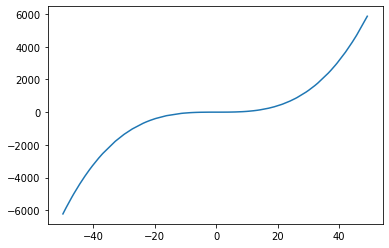

In [4]:
g = np.ndarray(shape=(80, 2))
g[:, 0] = x_test.reshape(80)
g[:, 1] = y_test.reshape(80)
g = g[g[:, 0].argsort()]
plt.plot(g[:, 0], g[:, 1])

In [5]:
train = np.ndarray(shape=(XTrain.shape[0], XTrain.shape[1], 2))
train[:, :, 0] = XTrain
train[:, :, 1] = y_train

test_set = np.ndarray(shape=(x_test.shape[0], 2))
test_set[:, 0] = x_test.reshape(80,)
test_set[:, 1] = y_test

In [10]:
test_xs = test_set[:, :1]
test_ys = test_set[:, 1]

degree_vs_bias = np.zeros(shape=(MAX_POLY, 2))

for degree in range(1, MAX_POLY + 1):

    polyfeat = PolynomialFeatures(degree)
#     print(test_xs)
    test_poly_xs = polyfeat.fit_transform(test_xs)
    predicted = np.zeros(shape=(80, PARTITION_COUNT))

    for set_idx in range(PARTITION_COUNT):

        train_xs = x_train[set_idx]
        train_ys = y_train[set_idx]

        polyfeat = PolynomialFeatures(degree)
        poly = polyfeat.fit_transform(train_xs)
        model = linear_model.LinearRegression()
        model.fit(poly, train_ys)
        predicted[:, set_idx] = model.predict(test_poly_xs)

    expected_val = np.mean(predicted, axis=1) 
    
   

    bias = np.sqrt(np.mean((expected_val - test_ys) ** 2))
    degree_vs_bias[degree - 1, 0] = bias
    
#     variance = np.mean(
#         np.mean(
#             (
#                 predicted
#                 - np.repeat(expected_val.reshape(80, 1), PARTITION_COUNT, axis=1)
#             )
#             ** 2,
#             axis=1,
#         )
#     )

    variance = np.mean(np.var(predicted, axis=1))

#     print(
#         "degree {} bias = {} variance = {}".format(
#             degree, degree_vs_bias[degree - 1][0], variance
#         )
#     )
    
    print("\\hline")
    print("{} & {} & {} \\\\".format(degree, bias, variance))
    degree_vs_bias[degree - 1, 1] = variance

\hline
1 & 999.6141239858127 & 70545.48914575046 \\
\hline
2 & 977.0461983931082 & 125870.85554877334 \\
\hline
3 & 96.90061979570203 & 150073.7395464768 \\
\hline
4 & 104.43825033995597 & 212235.70832526154 \\
\hline
5 & 96.63950688681115 & 276388.48025474057 \\
\hline
6 & 101.23529987681114 & 316863.49843748985 \\
\hline
7 & 101.66255879943755 & 357510.98475735466 \\
\hline
8 & 100.74432611287484 & 404286.670685786 \\
\hline
9 & 103.99753380044281 & 459132.37837248633 \\


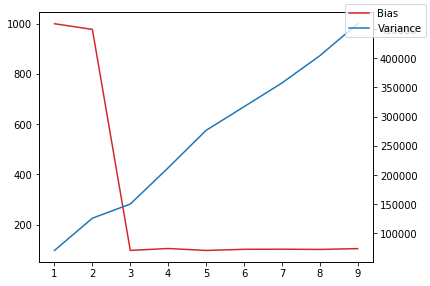

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(1, MAX_POLY + 1)), degree_vs_bias[:,0], color=color, label='Bias')
# plt.yscale('log')
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(1, MAX_POLY + 1)), degree_vs_bias[:,1], color=color, label='Variance')
fig.tight_layout()
fig.legend()
plt.show()

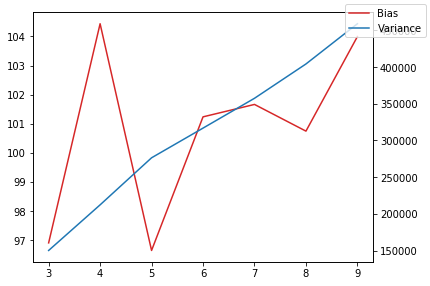

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(3, MAX_POLY + 1)), degree_vs_bias[2:,0], color=color, label='Bias')
# plt.yscale('log')
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(3, MAX_POLY + 1)), degree_vs_bias[2:,1], color=color, label='Variance')
fig.tight_layout()
fig.legend()
plt.show()